In [1]:
%matplotlib inline

##Shocl Analysis across CDF archive
###pilot research regaring the observation using SOFIA

###Shock origin in embedded protostars
What fraction of the emission (cooling lines) is dominated by shocks in the outflow cavity?

What fraction of those are C-shocks and J-shocks?

High-J CO lines are correlated by shocks, how to quantify them? (Visser 2012)

What trace C-shocks, and what trace J-shocks?  (H2O & OH?)

In [2]:
objlist = ['B1-a','B1-c','B335','BHR71','IRAS12496','GSS30-IRS1','IRAS03245','IRAS03301','L1455-IRS3','L1157','L1551-IRS5',\
           'RCrA-IRS7B','TMC1A','TMC1','TMR1','VLA1623','WL12'] # ,'V1735Cyg'
            # 'FUOri','V1057Cyg','V1331Cyg','V1515Cyg'
indir = '/home/bettyjo/yaolun/FWD_archive/CDF_archive/'
plotdir = '/home/bettyjo/yaolun/test/shock_analysis/'
import os
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

###investigate the corelation between H2O and OH

In [3]:
def read_fitting_co(filepath,noiselevel):
    from astropy.io import ascii
    co_label = []
    data = ascii.read(filepath)
    header = data.colnames
    data = data[(data['SNR']>noiselevel) & (data['Validity']!=0) & (data['Str(W/cm2)']>0)]

    ind_co = []
    for i in range(0, len(data['Line'])):
        if 'CO' in data['Line'][i]:
            #wl, wl_sig, flux, flux_sig, E_u, A, g
            if not ('HCO' in data['Line'][i]) or ('13CO' in data['Line'][i]):
                ind_co.append(i)
    co_data = data[ind_co]
    return co_data, co_data['Line']
def read_fitting_h2o(filepath,noiselevel):
    from astropy.io import ascii
    h2o_label = []
    data = ascii.read(filepath)
    header = data.colnames
    data = data[(data['SNR']>noiselevel) & (data['Validity']!=0) & (data['Str(W/cm2)']>0)]

    ind_h2o = []
    for i in range(0, len(data['Line'])):
        if 'H2O' in data['Line'][i]:
            #wl, wl_sig, flux, flux_sig, E_u, A, g
            ind_h2o.append(i)
    h2o_data = data[ind_h2o]
    return h2o_data, h2o_data['Line']
def read_fitting_oh(filepath,noiselevel):
    from astropy.io import ascii
    oh_label = []
    data = ascii.read(filepath)
    header = data.colnames
    data = data[(data['SNR']>noiselevel) & (data['Validity']!=0) & (data['Str(W/cm2)']>0)]

    ind_oh = []
    for i in range(0, len(data['Line'])):
        if 'OH' in data['Line'][i]:
            #wl, wl_sig, flux, flux_sig, E_u, A, g
            ind_oh.append(i)
    oh_data = data[ind_oh]
    return oh_data, oh_data['Line']
def read_fitting_oi(filepath,noiselevel):
    from astropy.io import ascii
    line_label = []
    data = ascii.read(filepath)
    header = data.colnames
    data = data[(data['SNR']>noiselevel) & (data['Validity']!=0) & (data['Str(W/cm2)']>0)]

    ind_line = []
    for i in range(0, len(data['Line'])):
        if 'OI' in data['Line'][i]:
            #wl, wl_sig, flux, flux_sig, E_u, A, g
            ind_line.append(i)
    line_data = data[ind_line]
    return line_data, line_data['Line']

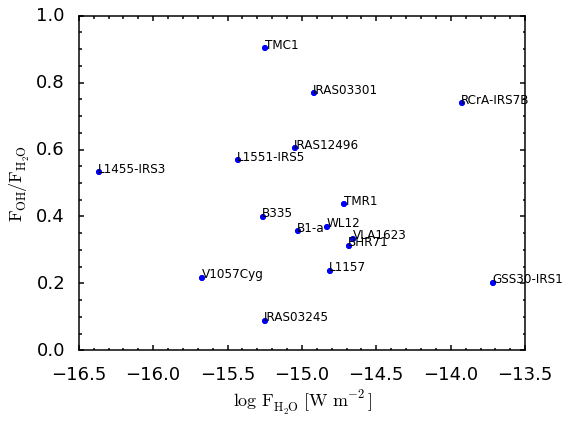

In [24]:
import numpy as np
import astropy as apy
# import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
h2o_tot = []
oh_tot = []
plot_obj = objlist
for obj in objlist:
    # H2O
    h2o_pacs, h2o_name_pacs = read_fitting_h2o(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    h2o_spire, h2o_name_spire = read_fitting_h2o(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    h2o_data = apy.table.vstack((h2o_pacs, h2o_spire))
    h2o_name = np.hstack((h2o_name_pacs.data, h2o_name_spire.data))
    
    # OH
    oh_pacs, oh_name_pacs = read_fitting_oh(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    oh_spire, oh_name_spire = read_fitting_oh(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    oh_data = apy.table.vstack((oh_pacs, oh_spire))
    oh_name = np.hstack((oh_name_pacs.data, oh_name_spire.data))
    
    # do not count if either H2O or OH is not found
    check = 0
    if len(h2o_name) == 0:
        print 'H2O is not found in %s.' % obj
        check += 1
    if len(oh_name) == 0:
        print 'OH is not found in %s.' % obj
        check += 1
    if check != 0:
        plot_obj.pop(objlist.index(obj))
        continue
    
    # store the total line fluxes
    h2o_tot.append(np.sum(h2o_data['Str(W/cm2)']*1e4))
    oh_tot.append(np.sum(oh_data['Str(W/cm2)']*1e4))
    
h2o_tot = np.array(h2o_tot)
oh_tot = np.array(oh_tot)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(np.log10(h2o_tot), oh_tot/h2o_tot, 'o', color='b', mec='None')
for i in range(len(plot_obj)):
    ax.annotate(plot_obj[i], (np.log10(h2o_tot[i]), oh_tot[i]/h2o_tot[i]), fontsize=12)

ax.set_xlabel(r'$\rm{log\,F_{H_{2}O}\,[W\,m^{-2}]}$', fontsize=18)
ax.set_ylabel(r'$\rm{F_{OH}/F_{H_{2}O}}$', fontsize=18)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)
# ax.set_xlim([0,2.2e-14])

# fig.savefig(plotdir+'H2O_vs_OH.pdf', format='pdf', dpi=300, bbox_inches='tight')

H2O verses OH doesn't show any correlation.  (their strengths are positive correlation however)

###How about [OI] verses H2O

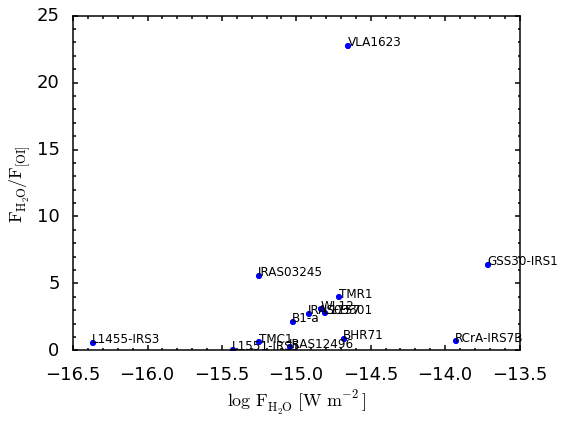

In [37]:
import numpy as np
import astropy as apy
# import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
h2o_tot = []
oh_tot = []
oi_tot = []
plot_obj = objlist
for obj in objlist:
    # H2O
    h2o_pacs, h2o_name_pacs = read_fitting_h2o(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    h2o_spire, h2o_name_spire = read_fitting_h2o(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    h2o_data = apy.table.vstack((h2o_pacs, h2o_spire))
    h2o_name = np.hstack((h2o_name_pacs.data, h2o_name_spire.data))
    
    # OH
    oh_pacs, oh_name_pacs = read_fitting_oh(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    oh_spire, oh_name_spire = read_fitting_oh(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    oh_data = apy.table.vstack((oh_pacs, oh_spire))
    oh_name = np.hstack((oh_name_pacs.data, oh_name_spire.data))
    
    # OI
    oi_data, oi_name = read_fitting_oi(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    
    # do not count if either H2O or OH is not found
    check = 0
    if len(h2o_name) == 0:
        print 'H2O is not found in %s.' % obj
        check += 1
    if len(oi_name) == 0:
        print 'OI is not found in %s.' % obj
        check += 1
    if len(oh_name) == 0:
        print 'OH is not found in %s.' % obj
        check += 1 
    if check != 0:
        plot_obj.pop(objlist.index(obj))
        continue
    
    # store the total line fluxes
    h2o_tot.append(np.sum(h2o_data['Str(W/cm2)']*1e4))
    oh_tot.append(np.sum(oh_data['Str(W/cm2)']*1e4))
    oi_tot.append(np.sum(oi_data['Str(W/cm2)']*1e4))
    
h2o_tot = np.array(h2o_tot)
oh_tot = np.array(oh_tot)
oi_tot = np.array(oi_tot)

# print np.shape(h2o_tot), np.shape(oi_tot), np.shape(plot_obj)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(np.log10(h2o_tot), h2o_tot/oi_tot, 'o', color='b', mec='None')
for i in range(len(plot_obj)):
    ax.annotate(plot_obj[i], (np.log10(h2o_tot[i]), h2o_tot[i]/oi_tot[i]), fontsize=12)

ax.set_xlabel(r'$\rm{log\,F_{H_{2}O}\,[W\,m^{-2}]}$', fontsize=18)
ax.set_ylabel(r'$\rm{F_{H_{2}O}/F_{[OI]}}$', fontsize=18)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

###DIGIT mass loss from [OI] and CO (Green 2013)
<img src="digit_green_oi_co.png" width="1000">

###UV-heated and C-shock contribution to CO fluxes (Visser 2012)
<img src="Visser_2012_co_fit.png" width=900>

##luminosity from atomic coolant and molecular coolant verse bolometric temperature

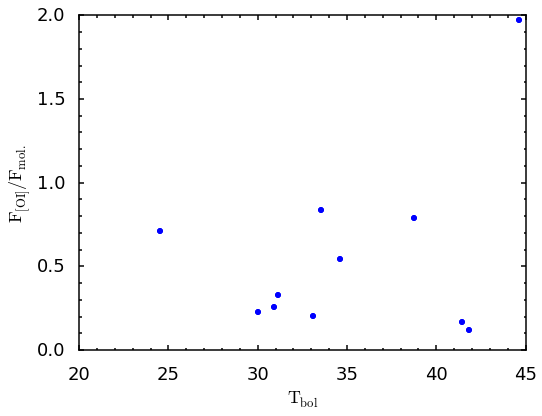

In [83]:
# import t_bol script
import sys
sys.path.append('/home/bettyjo/yaolun/programs/misc/hyperion/')
from t_bol import *

import numpy as np
import astropy as apy
# import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import os
co_tot = []
h2o_tot = []
oh_tot = []
oi_tot = []
tbol_tot = []
plot_obj = objlist
for obj in objlist:
    # CO
    co_pacs, co_name_pacs = read_fitting_co(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    co_spire, co_name_spire = read_fitting_co(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    co_data = apy.table.vstack((co_pacs, co_spire))
    co_name = np.hstack((co_name_pacs.data, co_name_spire.data))
    
    # take only high-J CO lines (J > 30)
    co_name = co_name[co_data['ObsWL(um)'] < 89]
    co_data = co_data[co_data['ObsWL(um)'] < 89]
    
    # H2O
    h2o_pacs, h2o_name_pacs = read_fitting_h2o(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    h2o_spire, h2o_name_spire = read_fitting_h2o(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    h2o_data = apy.table.vstack((h2o_pacs, h2o_spire))
    h2o_name = np.hstack((h2o_name_pacs.data, h2o_name_spire.data))
    
    # OH
    oh_pacs, oh_name_pacs = read_fitting_oh(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    oh_spire, oh_name_spire = read_fitting_oh(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    oh_data = apy.table.vstack((oh_pacs, oh_spire))
    oh_name = np.hstack((oh_name_pacs.data, oh_name_spire.data))
    
    # OI
    oi_data, oi_name = read_fitting_oi(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    
    # do not count if either OI is not found, or CO, H2O, and OH are not found
    check = 0
    if len(oi_name) == 0:
        print 'OI is not found in %s.' % obj
        check += 1
    if (len(oh_name) == 0) and (len(co_name) == 0) and (len(h2o_name) == 0):
        print 'mol. coolant is not found in %s.' % obj
        check += 1 
    if check != 0:
        plot_obj.pop(objlist.index(obj))
        continue
    
    # store the total line fluxes
    co_tot.append(np.sum(co_data['Str(W/cm2)']*1e4))
    h2o_tot.append(np.sum(h2o_data['Str(W/cm2)']*1e4))
    oh_tot.append(np.sum(oh_data['Str(W/cm2)']*1e4))
    oi_tot.append(np.sum(oi_data['Str(W/cm2)']*1e4))
    
    # calculate T_bol
    # First, read in the spectrum
    if os.path.exists(indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_continuum.txt'):
        wl_pacs, flux_pacs, unc_pacs= np.genfromtxt(\
            indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_continuum.txt',skip_header=1).T
    else:
        wl_pacs, flux_pacs, unc_pacs= np.genfromtxt(\
            indir+obj+'/pacs/data/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',skip_header=1).T

    wl_spire, flux_spire = np.genfromtxt(\
            indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_continuum.txt',skip_header=1).T
    wave = np.hstack((wl_pacs, wl_spire))
    flux = np.hstack((flux_pacs, flux_spire))
    # Calculate T_bol
    tbol_tot.append(t_bol(wave, flux))
    
co_tot = np.array(co_tot)
h2o_tot = np.array(h2o_tot)
oh_tot = np.array(oh_tot)
oi_tot = np.array(oi_tot)

mol_tot = co_tot + h2o_tot + oh_tot

# Make some plots
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(tbol_tot, oi_tot/mol_tot, 'bo', mec='None')
ax.set_xlabel(r'$\rm{T_{bol}}$', fontsize=18)
ax.set_ylabel(r'$\rm{F_{[OI]}/F_{mol.}}$', fontsize=18)

# ax.set_xlim([0,5e-15])

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

##Spitzer IRS map (Neufeld et al. 2009)

Found [FeII] traces faster, dissociative shocks.

Would like to see whether [FeII] observed in Spitzer scaled with [OI] observed in Herschel

1. Sources in N09, BHR71, L1157, L1448, NGC2071, and VLA 1623

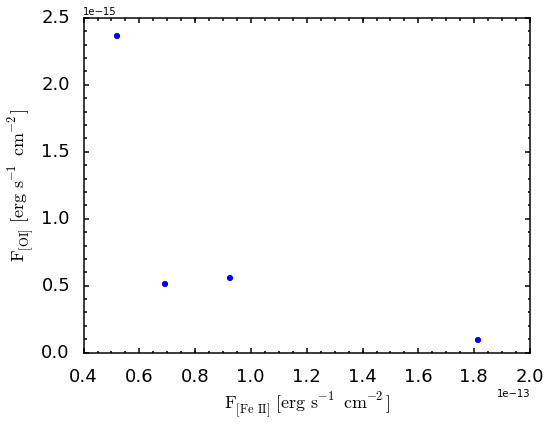

In [78]:
obj_n09 = ['BHR71', 'L1157', 'L1448-MM', 'VLA1623']
fe_n09 = [4.5, 8.0, 6.0, 15.7] # unit: 1e-6 erg cm-2 s-1 sr-1, measured in a Gaussian beam size of 25"
import numpy as np
import astropy as apy
# import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import os
oi_tot = []
plot_obj = obj_n09
for obj in obj_n09:
    # OI
    oi_data, oi_name = read_fitting_oi(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    
    # do not count if either OI is not found, or CO, H2O, and OH are not found
    check = 0
    if len(oi_name) == 0:
        print 'OI is not found in %s.' % obj
        check += 1
    if check != 0:
        plot_obj.pop(objlist.index(obj))
        continue
    
    # store the total line fluxes
    oi_tot.append(np.sum(oi_data['Str(W/cm2)']*1e4))

oi_tot = np.array(oi_tot)

# covert [FeII] unit
fe_n09 = np.array(fe_n09)*1e-6/4.25e10*(25/2.)**2*np.pi

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(fe_n09, oi_tot, 'bo', mec='None')
ax.set_xlabel(r'$\rm{F_{[Fe\,II]}\,[erg\,s^{-1}\,cm^{-2}]}$', fontsize=18)
ax.set_ylabel(r'$\rm{F_{[OI]}\,[erg\,s^{-1}\,cm^{-2}]}$', fontsize=18)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

##J-shock to C-shock ratio verses dynamics age

Should use outflow age, but consider only T_bol now

OI is not found in B335.


IndexError: list index out of range

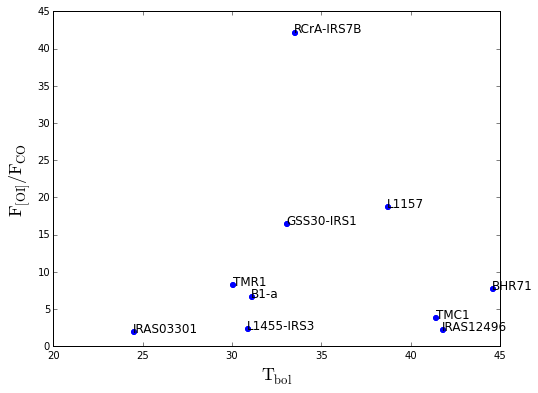

In [5]:
# import t_bol script
import sys
sys.path.append('/home/bettyjo/yaolun/programs/misc/hyperion/')
from t_bol import *

import numpy as np
import astropy as apy
# import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import os
co_tot = []
oi_tot = []
tbol_tot = []
plot_obj = objlist
for obj in objlist:
    # CO
    co_pacs, co_name_pacs = read_fitting_co(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    co_spire, co_name_spire = read_fitting_co(\
        indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt',3)
    co_data = apy.table.vstack((co_pacs, co_spire))
    co_name = np.hstack((co_name_pacs.data, co_name_spire.data))
    
    # take only high-J CO lines (J > 30)
    co_name = co_name[co_data['ObsWL(um)'] < 89]
    co_data = co_data[co_data['ObsWL(um)'] < 89]
    
    # OI
    oi_data, oi_name = read_fitting_oi(\
        indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt',3)
    
    # do not count if either OI is not found, or CO, H2O, and OH are not found
    check = 0
    if len(oi_name) == 0:
        print 'OI is not found in %s.' % obj
        check += 1
    if (len(co_name) == 0):
        print 'high-J CO is not found in %s.' % obj
        check += 1 
    if check != 0:
        plot_obj.pop(objlist.index(obj))
        continue
    
    # store the total line fluxes
    co_tot.append(np.sum(co_data['Str(W/cm2)']*1e4))
    oi_tot.append(np.sum(oi_data['Str(W/cm2)']*1e4))
    
    # calculate T_bol
    # First, read in the spectrum
    if os.path.exists(indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_continuum.txt'):
        wl_pacs, flux_pacs, unc_pacs= np.genfromtxt(\
            indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_continuum.txt',skip_header=1).T
    else:
        wl_pacs, flux_pacs, unc_pacs= np.genfromtxt(\
            indir+obj+'/pacs/data/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',skip_header=1).T

    wl_spire, flux_spire = np.genfromtxt(\
            indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_continuum.txt',skip_header=1).T
    wave = np.hstack((wl_pacs, wl_spire))
    flux = np.hstack((flux_pacs, flux_spire))
    # Calculate T_bol
    tbol_tot.append(t_bol(wave, flux))
    
co_tot = np.array(co_tot)
oi_tot = np.array(oi_tot)


# Make some plots
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(tbol_tot, oi_tot/co_tot, 'bo', mec='None')
ax.set_xlabel(r'$\rm{T_{bol}}$', fontsize=18)
ax.set_ylabel(r'$\rm{F_{[OI]}/F_{CO}}$', fontsize=18)

for i in range(len(objlist)):
    ax.annotate(objlist[i], (tbol_tot[i], oi_tot[i]/co_tot[i]), fontsize=12)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)